In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [42]:
all_players = pd.read_csv('all_players.csv')
real_players = pd.read_csv('real_players.csv').drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

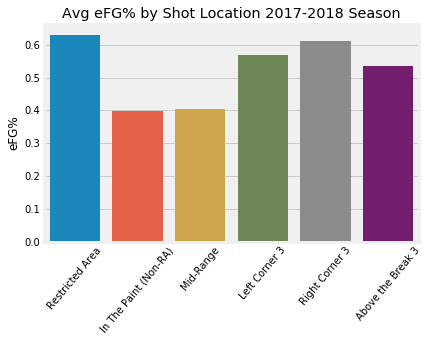

In [24]:
ax = sns.barplot(x = list(avgs.index),y = avgs.values)
plt.xticks(rotation=50)
ax.set_ylabel('eFG%')
ax.set_title('Avg eFG% by Shot Location 2017-2018 Season')

In [41]:
real_players.sort_values(by=['SEASON','PTS'],ascending=False)[['PLAYER','SEASON','POSITION', 'PTS','FG3A', 'FG3M', 'FG3_PCT', 'FGA','FGM', 'FG_PCT']]

,PLAYER,SEASON,POSITION,PTS,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT
2812,Russell Westbrook,2016,G,31.580247,7.197531,2.469136,0.327531,23.962963,10.172840,0.425136
2667,James Harden,2016,G,29.086420,9.333333,3.234568,0.339099,18.925926,8.320988,0.443272
2590,Isaiah Thomas,2016,G,28.934211,8.500000,3.223684,0.374763,19.381579,8.973684,0.463868
2614,Anthony Davis,2016,F-C,27.986667,1.786667,0.533333,0.194453,20.346667,10.266667,0.501253
2828,DeMar DeRozan,2016,G,27.297297,1.675676,0.445946,0.184351,20.878378,9.743243,0.465730
2780,Damian Lillard,2016,G,26.986667,7.720000,2.853333,0.358987,19.840000,8.813333,0.440600
2610,DeMarcus Cousins,2016,F-C,26.972222,5.041667,1.819444,0.339222,19.888889,8.986111,0.451403
2606,LeBron James,2016,F,26.405405,4.621622,1.675676,0.327662,18.162162,9.945946,0.552878
2802,Kawhi Leonard,2016,F,25.513514,5.229730,1.986486,0.382622,17.729730,8.594595,0.486068
2657,Stephen Curry,2016,G,25.303797,9.987342,4.101266,0.401316,18.265823,8.544304,0.467443


In [125]:
top_scorers = []
for year in range(2007,2017):
    top_scorers.append(real_players.iloc[real_players[real_players['SEASON'] == year]['PTS'].idxmax()])

In [69]:
from nba_py.player import PlayerShootingSplits
lebron_shots = PlayerShootingSplits(2544, season='2007-08')

In [71]:
shot_areas = lebron_shots.shot_areas().drop(lebron_shots.shot_areas().index[6])
shot_types = lebron_shots.shot_types_summary()

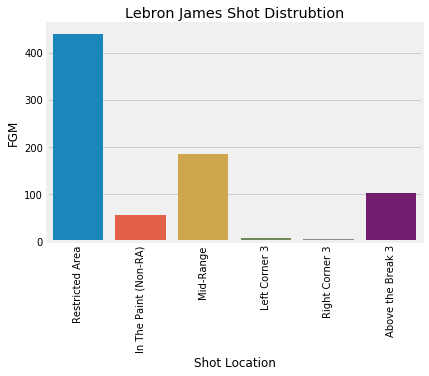

In [90]:
ax = sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_areas)
plt.xticks(rotation=90)
ax.set_xlabel('Shot Location')
ax.set_title('Lebron James Shot Distrubtion')

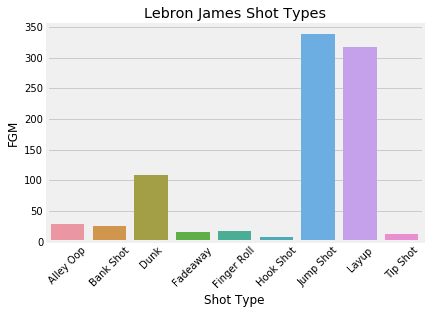

In [92]:
ax = sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_types)
plt.xticks(rotation=45)
ax.set_xlabel('Shot Type')
ax.set_title('Lebron James Shot Types')

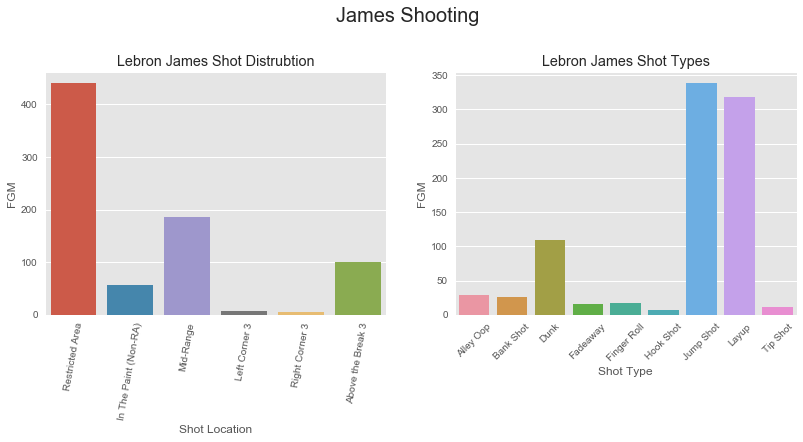

In [119]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_areas, ax=ax1)
ax1.set_xlabel('Shot Location')
ax1.set_title('Lebron James Shot Distrubtion')
for tick in ax1.get_xticklabels():
    tick.set_rotation(80)
sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_types, ax=ax2)
plt.xticks(rotation=45)
ax2.set_xlabel('Shot Type')
ax2.set_title('Lebron James Shot Types')
fig.suptitle('James Shooting', fontsize=20)
plt.subplots_adjust(wspace=0.2, top=0.8)
fig.savefig("bronbron.png")
plt.show()

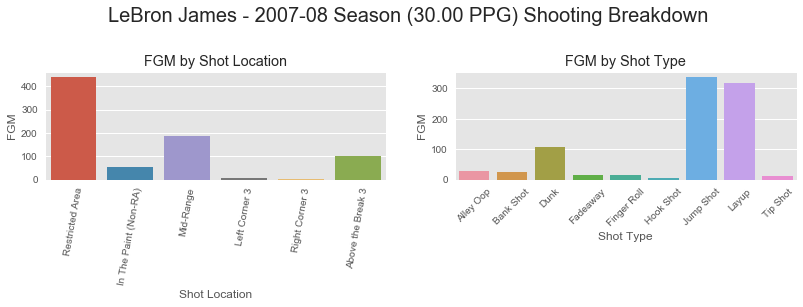

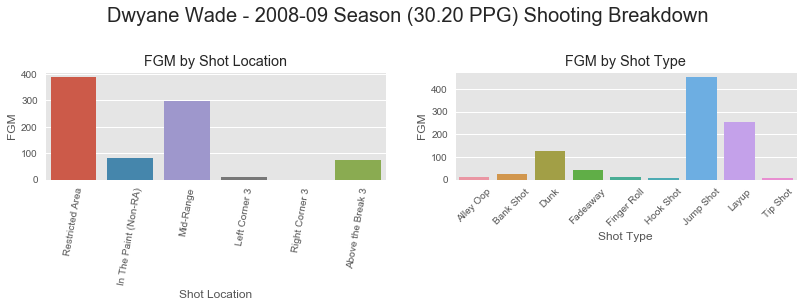

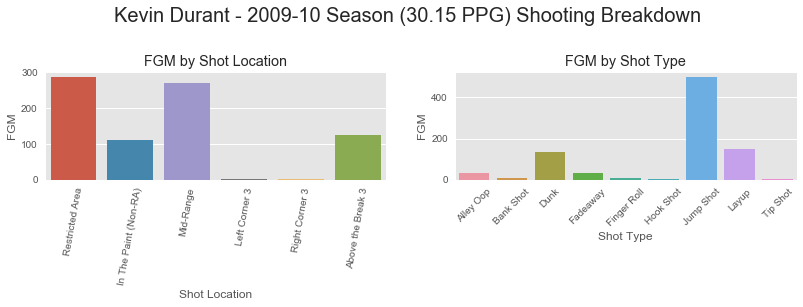

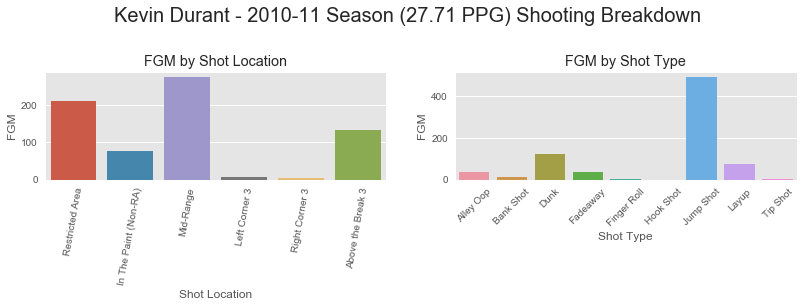

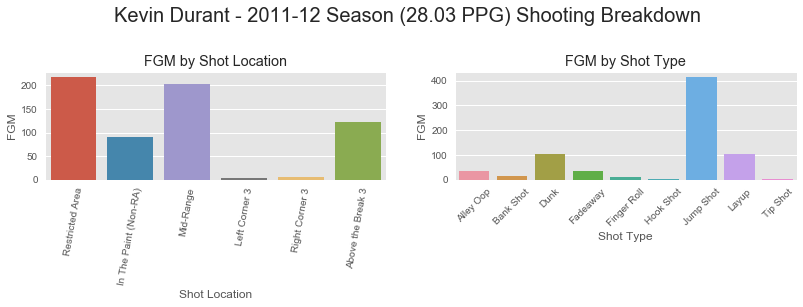

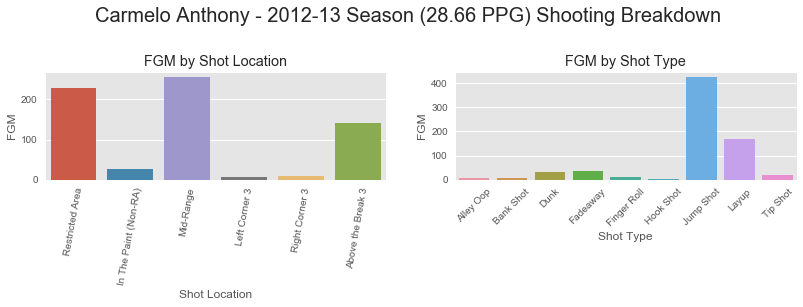

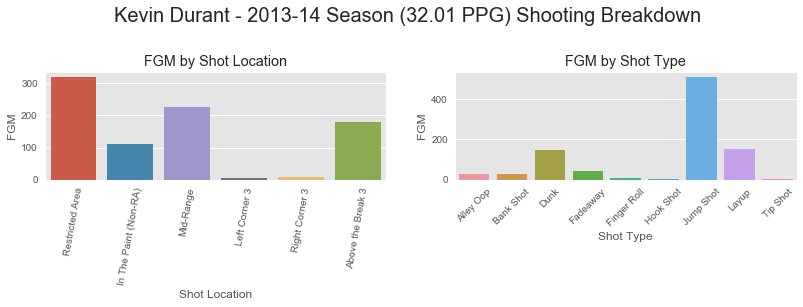

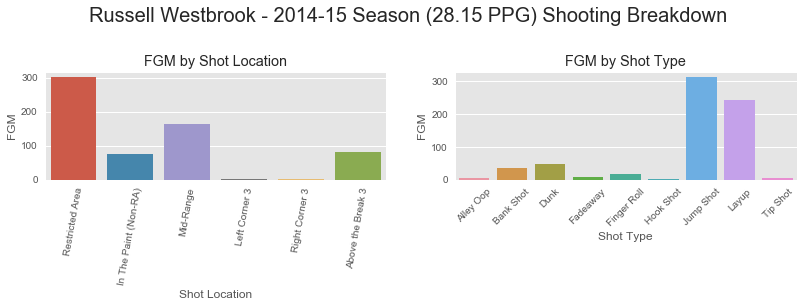

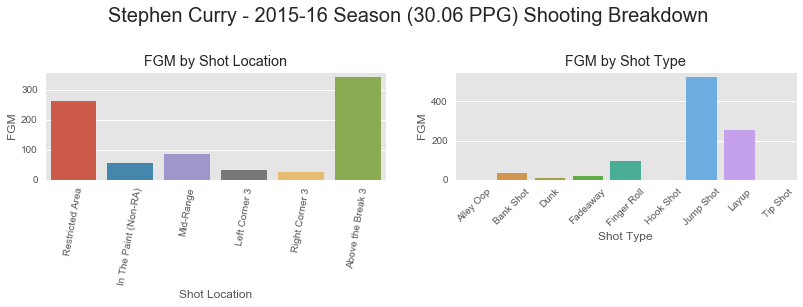

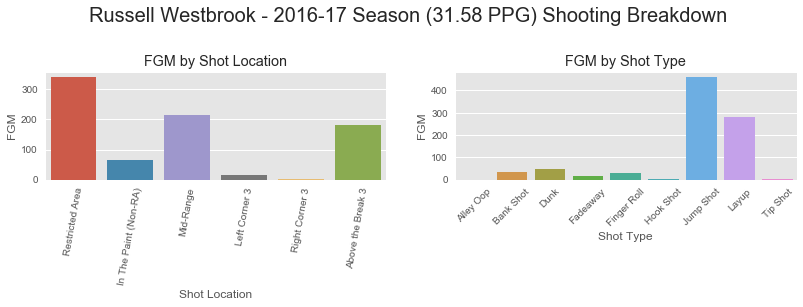

In [174]:
for scorer in top_scorers:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
    season = str(scorer['SEASON'])+"-"+str(scorer['SEASON']+1)[2:]
    player_shots = PlayerShootingSplits(scorer['PLAYER_ID'], season=season)
    shot_areas = player_shots.shot_areas().drop(player_shots.shot_areas().index[6])
    shot_types = player_shots.shot_types_summary()
    sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_areas, ax=ax1)
    ax1.set_xlabel('Shot Location')
    ax1.set_title('FGM by Shot Location')
    for tick in ax1.get_xticklabels():
        tick.set_rotation(80)
    sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_types, ax=ax2)
    plt.xticks(rotation=45)
    ax2.set_xlabel('Shot Type')
    ax2.set_title('FGM by Shot Type')
    fig.suptitle('%s - %s Season (%.2f PPG) Shooting Breakdown' % (scorer['PLAYER'],season,scorer['PTS']), fontsize=20)
    plt.subplots_adjust(wspace=0.2, top=0.8, bottom=0.5)
    fig.savefig("%s_%s_scoring.png" % (scorer['PLAYER'],season))
    plt.show()
    time.sleep(3)

In [132]:
from nba_py.team import TeamShootingSplits
from nba_py.team import TeamList, TeamSummary
from nba_py.team import TeamYearOverYearSplits
all_teams = TeamList().info().head(30)

In [140]:
top_scoring_teams = {}
for i in range(2007,2017):
    season = str(i)+"-"+str(i+1)[2:]
    for index, row in all_teams.iterrows():
        if TeamSummary(row['TEAM_ID'],season=season).season_ranks()['PTS_RANK'][0] == 1:
            top_scoring_teams[season] = row['TEAM_ID']
        time.sleep(2)

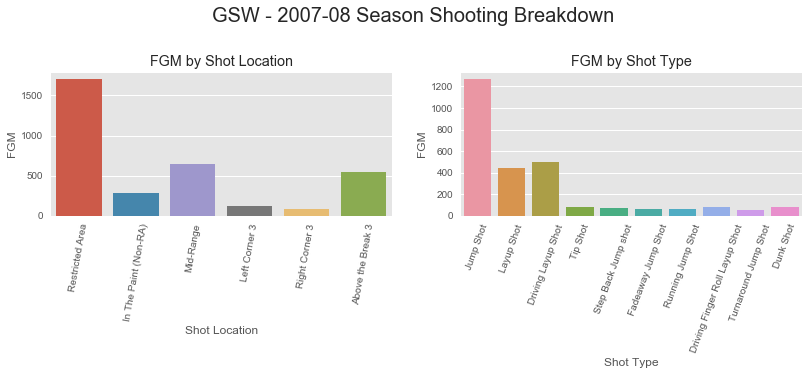

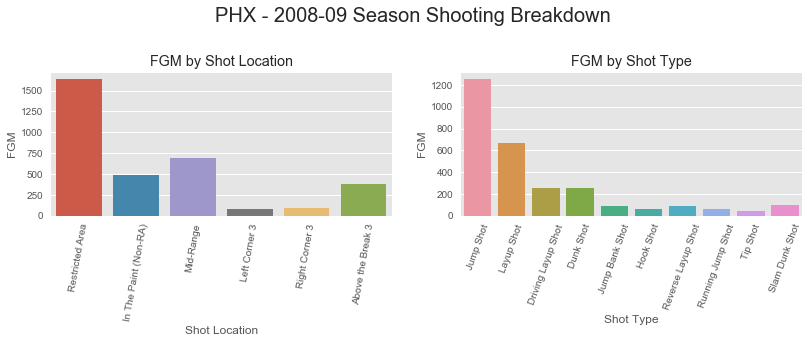

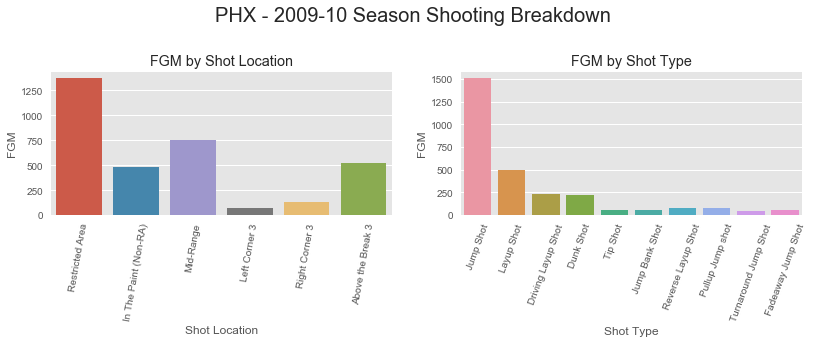

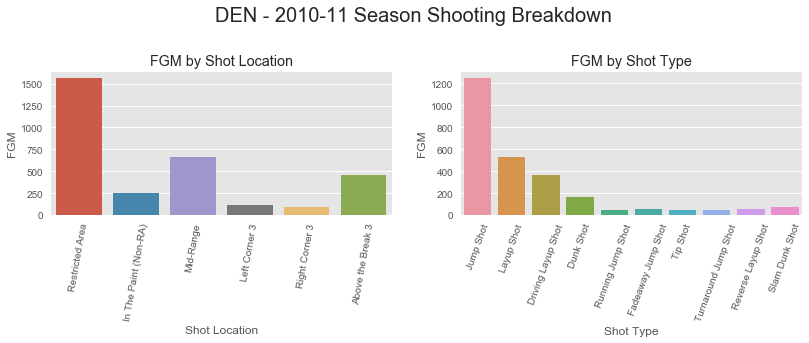

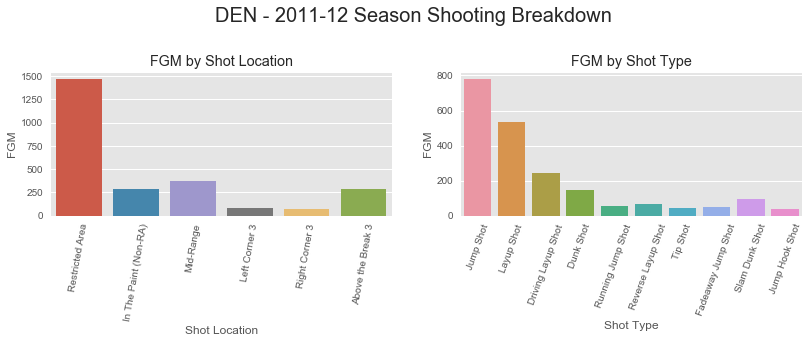

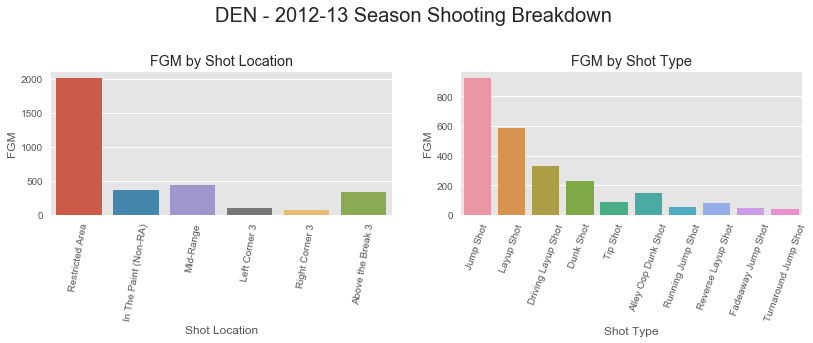

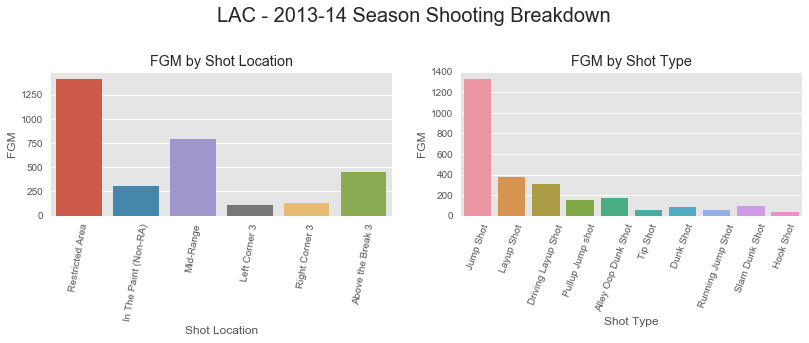

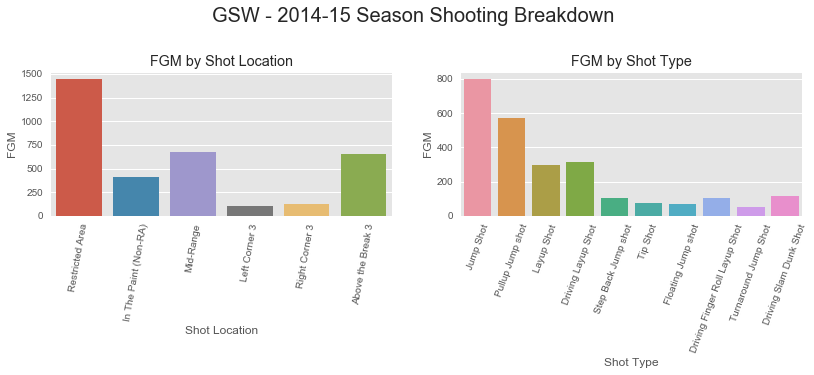

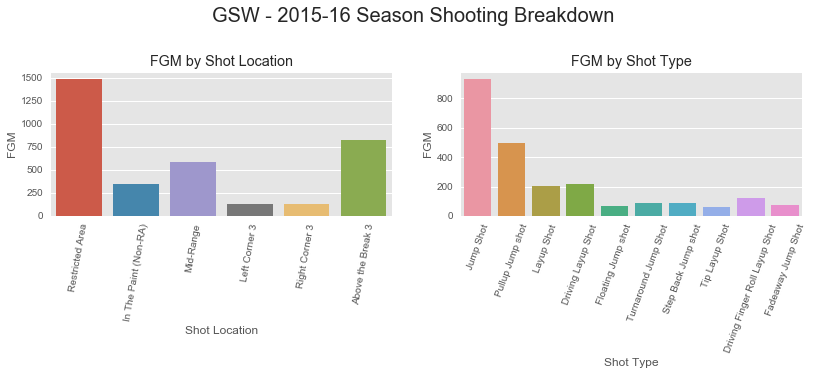

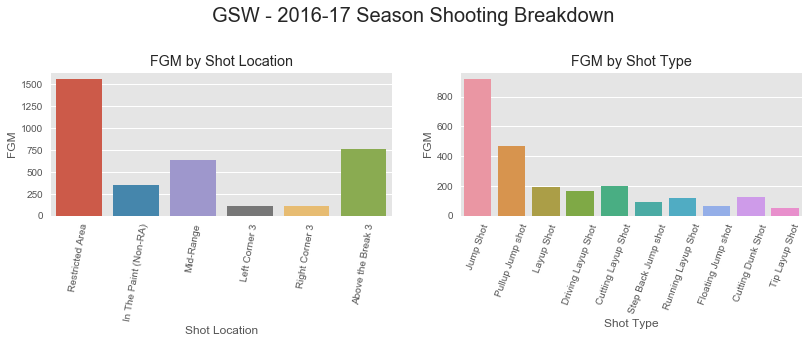

In [175]:
for season in top_scoring_teams:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
    team_abr = all_teams[all_teams['TEAM_ID'] == top_scoring_teams[season]].iloc[0]['ABBREVIATION']
    team_shots = TeamShootingSplits(top_scoring_teams[season], season=season)
    shot_areas = team_shots.shot_areas().drop(team_shots.shot_areas().index[6])
    shot_types = team_shots.shot_type_summary().sort_values(by=['FGA'], ascending=False).head(10)
    sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_areas, ax=ax1)
    ax1.set_xlabel('Shot Location')
    ax1.set_title('FGM by Shot Location')
    for tick in ax1.get_xticklabels():
        tick.set_rotation(80)
    sns.barplot(x='GROUP_VALUE', y='FGM', data=shot_types, ax=ax2)
    plt.xticks(rotation=70)
    ax2.set_xlabel('Shot Type')
    ax2.set_title('FGM by Shot Type')
    fig.suptitle('%s - %s Season Shooting Breakdown' % (team_abr,season), fontsize=20)
    plt.subplots_adjust(wspace=0.2, top=0.8, bottom=0.4)
    fig.savefig("%s_%s_scoring.png" % (team_abr,season))
    plt.show()
    time.sleep(3)

In [169]:
shot_types.sort_values(by=['FGA'], ascending=False).head(10)

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
24,Shot Type,Jump Shot,921,3038,0.303,594,1934,0.307,0.401,99,...,45,48,13,35,4,7,11,37,174,Jump Shot
27,Shot Type,Pullup Jump shot,465,763,0.609,269,433,0.621,0.786,1,...,19,24,24,24,5,6,21,27,174,Pullup Jump shot
25,Shot Type,Layup Shot,193,491,0.393,0,0,0.000,0.393,119,...,46,49,14,34,11,8,14,34,174,Layup Shot
13,Shot Type,Driving Layup Shot,163,257,0.634,0,0,0.000,0.634,27,...,30,47,36,12,11,8,37,11,174,Driving Layup Shot
4,Shot Type,Cutting Layup Shot,199,234,0.850,0,0,0.000,0.850,7,...,16,44,1,40,11,8,1,40,174,Cutting Layup Shot
41,Shot Type,Step Back Jump shot,92,165,0.558,45,79,0.570,0.694,1,...,26,24,39,9,6,5,33,15,174,Step Back Jump shot
36,Shot Type,Running Layup Shot,116,161,0.720,0,0,0.000,0.720,8,...,23,46,23,25,11,8,25,23,174,Running Layup Shot
20,Shot Type,Floating Jump shot,63,134,0.470,0,1,0.000,0.470,0,...,44,1,29,19,11,8,30,18,174,Floating Jump shot
2,Shot Type,Cutting Dunk Shot,128,132,0.970,0,0,0.000,0.970,2,...,5,33,1,40,11,8,1,40,174,Cutting Dunk Shot
43,Shot Type,Tip Layup Shot,49,128,0.383,0,0,0.000,0.383,2,...,47,33,40,1,11,8,41,1,174,Tip Layup Shot
